<a href="https://colab.research.google.com/github/Lakuna29/Sabrina-Blanco/blob/main/DatascienceI_Blanco_Sabrina_Comision67465.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análisis de Ventas del Centro de Producción – Urban Group

Descripción del Dataset

El presente análisis se basa en un conjunto de datos que representa las ventas del Centro de Producción (CDP) del grupo gastronómico Urban Group, empresa en la que trabajo. Urban Group gestiona diversas marcas de restaurantes, tanto propios como franquiciados.
El CDP centraliza la compra de insumos y la producción de artículos que luego se distribuyen a los distintos locales. Estos artículos incluyen desde platos elaborados y envasados (listos para regenerar), hasta la limpieza y porcionado de carnes.

Cada fila del dataset representa una transacción de venta realizada por el CDP e incluye la siguiente información:

* Fecha, codigo, nombre, apellido, razón social del cliente
* Comprobante, prefijo y numero
* Tipo de local: Propio, franquicia o venta al personal interno
* Tipo de factura, numero de mesa, mozo
* Dia de entrega
* Precio, cantidad, codigo, nombre, rubro del articulo vendido
* Si fue facturado y el importe total de dicha factura

Hipótesis
1.	Las ventas totales a locales propios son mayores que las ventas a franquicias.
2.	Una razón social específica concentra el mayor volumen de compras, ya sea por representar varios locales o por un alto consumo individual.
3.	Existe un rubro de artículos que representa la mayor parte de las ventas del CDP. Se piensa que son las carnes rojas el rubro mas vendido.

Diccionario:

Columna | Tipo de dato | Descripción |

* Fecha | Fecha (datetime) | Fecha de la venta realizada por el CDP
* Cod_cliente | Int | Código interno del cliente
* Nombre | Texto | Nombre del cliente
* Apellido | Texto | Apellido del cliente
* Razón social | Texto | Razon social, si es personal nombre y apellido
* Comprobante| Texto/Numero | Numero de factura
* Prefijo | Numero | Identificadores únicos del comprobante
* Número | Numero | Identificadores únicos del comprobante
* Tipo de local | Texto | Puede ser "Propio", "Franquicia" o "Personal"
* Cod_cpb | Texto | Tipo de la factura emitida
* Concepto | Texto | Por donde ingreso la venta
* Mesa | Numérico (int) | Identificador del control de mesa (esto porque el * sistema esta adaptado de un restaurante)
* Cod_mozo | Numero | Nombre del mozo que cargó el pedido (esto porque el sistema esta adaptado de un restaurante)
* Envio | Texto | Dia de entrega
* Precio | Numérico (float) | Precio por unidad del artículo
* Cantidad | Numérico (float/int) | Unidades vendidas
* Nombre | Texto | Nombre del artículo
* Código artículo | Texto/Numérico | Código interno del artículo vendido
* Rubro | Texto  | Rubro al que pertenece el articulo
* Facturado | Texto  | Indica si fue o no facturado
* Importe | Numero (float) | Total de la factura que contiene el articulo


In [ ]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset en excel
from google.colab import files
uploaded = files.upload()

# Leer un archivo Excel
df = pd.read_excel('DataScienceI_BlancoSabrina.XLSX', sheet_name='DataSet')

#Mostrar las primeras 5 filas
df.head()

Saving DataScienceI_BlancoSabrina.XLSX to DataScienceI_BlancoSabrina.XLSX


,FECHA,COD_CLI,NOMBRE,APELLIDO,RAZON SOCIAL,COMPROBANT,PREFIJO,NUMERO,TIPO_LOCAL,COD_CPB,...,MESA,COD_MOZ,ENVIO,PRECIO,CANTIDAD,NOMBRE.1,COD_ART,RUBRO,FORMACOB,IMPORTE
0,2024-01-01,114,GERALDIN ...,AGUILAR ...,GERALDIN AGUILAR ...,FcB 0001-00025264,1,25264,PERSONAL,B,...,4053,100,PERSONAL,1520.12,3.0,HUEVOS X MAPLE ...,30099,POLLO,FACTURADO,4560.36
1,2024-01-01,241,NADIA ...,FERREIRA ...,NADIA FERREIRA ...,FcB 0001-00025263,1,25263,PERSONAL,B,...,4402,100,PERSONAL,2367.23,1.0,QUESO EN FETAS KG 1 (47017) ...,32027,QUESOS Y FIAMBRES,FACTURADO,6062.88
2,2024-01-01,241,NADIA ...,FERREIRA ...,NADIA FERREIRA ...,FcB 0001-00025262,1,25262,PERSONAL,B,...,4491,100,PERSONAL,2754.08,1.0,QUESO EN FETAS KG 1 (47017) ...,32027,QUESOS Y FIAMBRES,FACTURADO,6530.36
3,2024-01-01,241,NADIA ...,FERREIRA ...,NADIA FERREIRA ...,FcB 0001-00025263,1,25263,PERSONAL,B,...,4402,100,PERSONAL,3695.65,1.0,JAMON COCIDO EN FETAS KG 1 (47004) ...,32005,QUESOS Y FIAMBRES,FACTURADO,6062.88
4,2024-01-01,241,NADIA ...,FERREIRA ...,NADIA FERREIRA ...,FcB 0001-00025262,1,25262,PERSONAL,B,...,4491,100,PERSONAL,3776.28,1.0,JAMON COCIDO EN FETAS KG 1 (47004) ...,32005,QUESOS Y FIAMBRES,FACTURADO,6530.36


In [ ]:
#Informacion del data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53048 entries, 0 to 53047
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   FECHA         53048 non-null  datetime64[ns]
 1   COD_CLI       53048 non-null  int64         
 2   NOMBRE        53048 non-null  object        
 3   APELLIDO      53048 non-null  object        
 4   RAZON SOCIAL  53048 non-null  object        
 5   COMPROBANT    53048 non-null  object        
 6   PREFIJO       53048 non-null  int64         
 7   NUMERO        53048 non-null  int64         
 8   TIPO_LOCAL    53048 non-null  object        
 9   COD_CPB       53048 non-null  object        
 10  CONCEPTO      53048 non-null  object        
 11  MESA          53048 non-null  object        
 12  COD_MOZ       53048 non-null  int64         
 13  ENVIO         53048 non-null  object        
 14  PRECIO        53048 non-null  float64       
 15  CANTIDAD      53048 non-null  float6

Analizaremos cual es el RUBRO y el ARTICULO que mas vende

In [ ]:
# Moda
#Rubro mas vendido
moda_rubro = df["RUBRO"].mode()
print(moda_rubro)

#Articulo mas vendido
moda_articulo = df["NOMBRE.1"].mode()
print(moda_articulo)

0    SALSA Y ALINEO
Name: RUBRO, dtype: object
0    CRISPY CHICKEN PORC 2 (45016)                 ...
Name: NOMBRE.1, dtype: object


Veremos los rangos de precios de los articulos vendidos

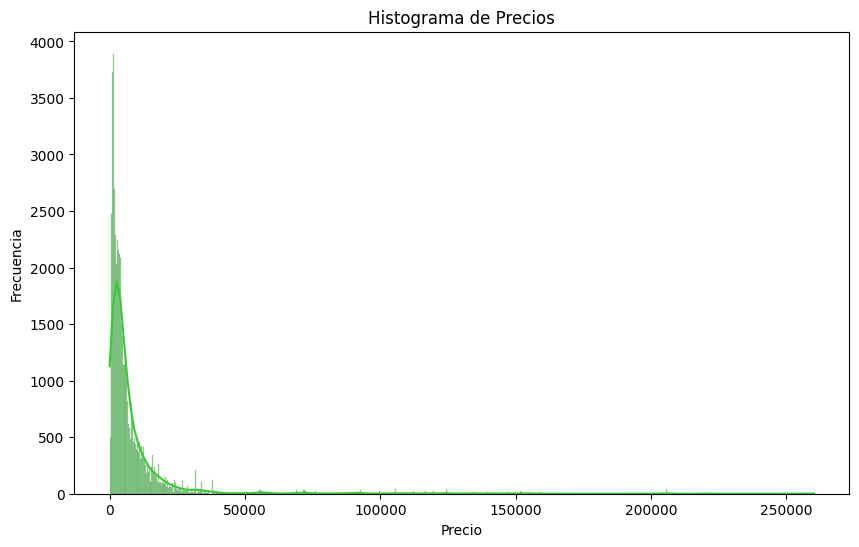

In [ ]:
#Histograma de precios
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="PRECIO", kde=True, color="#32CD32", edgecolor="black")
plt.title("Histograma de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

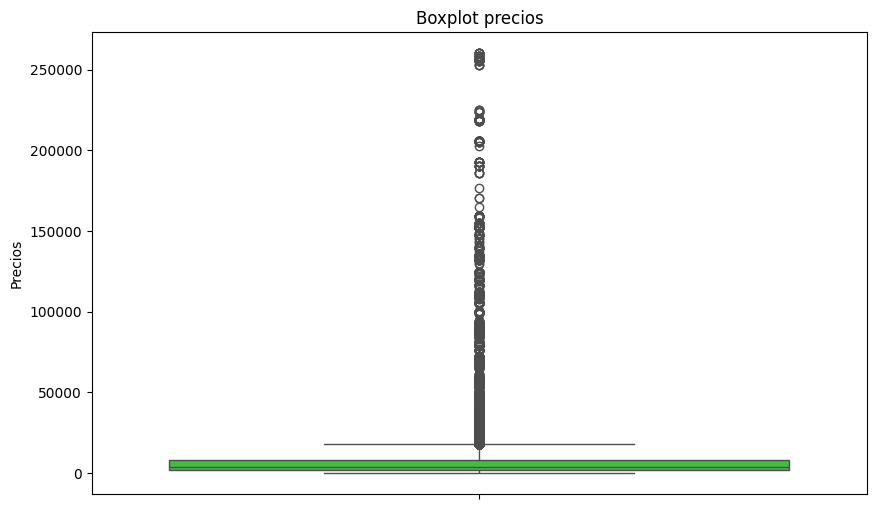

In [ ]:
#Boxplot de los precios
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y="PRECIO", color="#32CD32")
plt.title("Boxplot precios")
plt.ylabel("Precios")
plt.show()

Ventas por Rubro

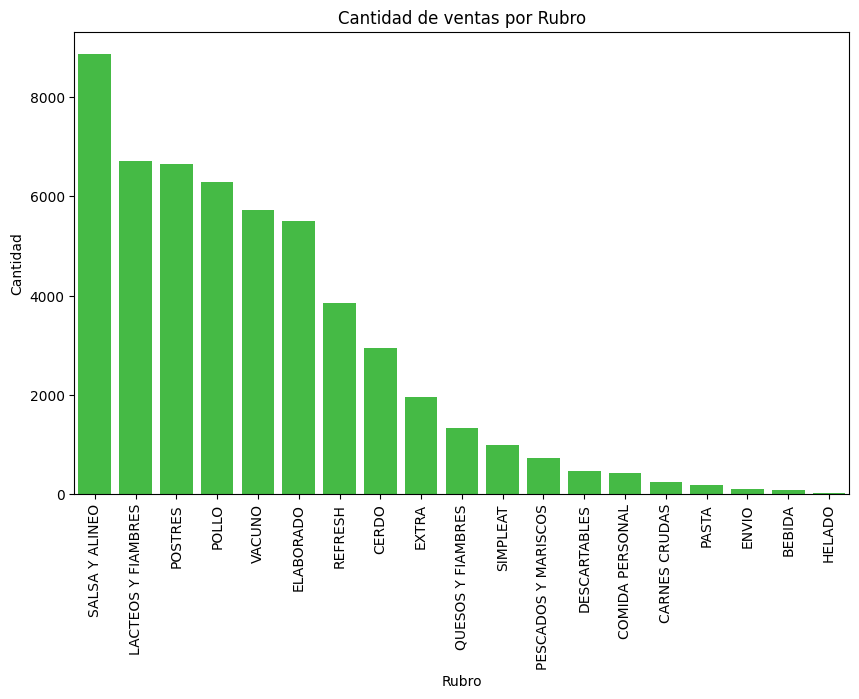

In [ ]:
# Grafico conteo de rubros con seaborn
# Ordenar los rubros
orden_rubros = df["RUBRO"].value_counts().index

#Grafico
plt.figure(figsize=(10,6))
sns.countplot(x="RUBRO", data=df, order=orden_rubros, color="#32CD32")
plt.xticks(rotation=90)
plt.title("Cantidad de ventas por Rubro")
plt.xlabel("Rubro")
plt.ylabel("Cantidad")
plt.show()

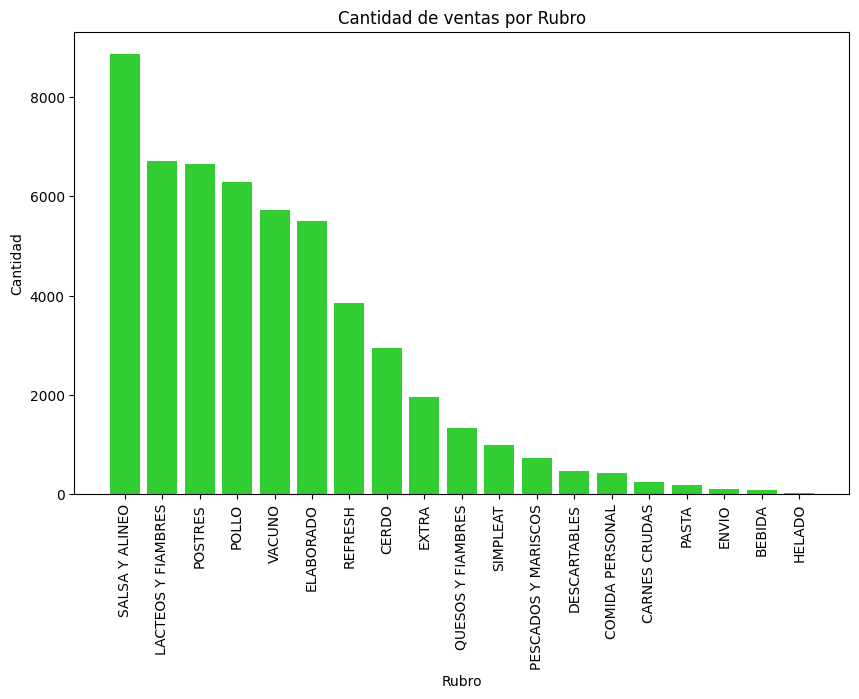

In [ ]:

# Gráfico de barras con matplotlib
# Conteo de rubros
conteo_rubro = df["RUBRO"].value_counts()

#Gráfico
plt.figure(figsize=(10,6))
plt.bar(conteo_rubro.index, conteo_rubro.values, color="#32CD32")
plt.xticks(rotation=90)
plt.title("Cantidad de ventas por Rubro")
plt.xlabel("Rubro")
plt.ylabel("Cantidad")
plt.show()

Análisis del gráfico

En cantidad de unidades se venden más las salsas ya que son utilizadas para más platos que las proteínas, debería de realizar el análisis del lado de la venta de los insumos ya que lo que suponemos es que lo que más se vende en kilogramos son carnes rojas y luego carnes blancas.
Postres será para analizar cuál es el artículo del rubro más vendido


Análisis del rubro POSTRES

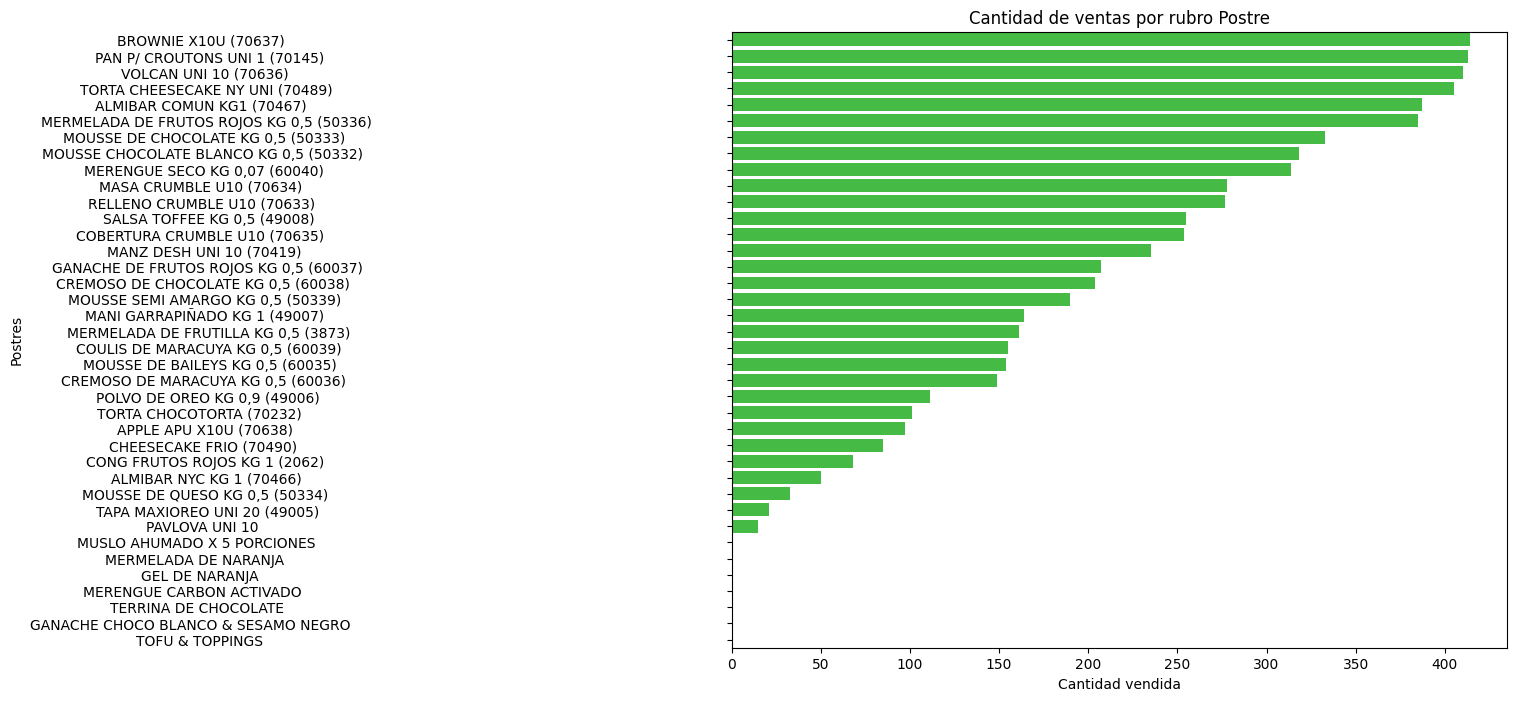

In [ ]:
#Gráfico de los artículos mas vendidos dentro del rubro postre
#Filtro para solo ver postres
df_postres = df[df["RUBRO"] == "POSTRES"]

#Gráfico
plt.figure(figsize=(10,8))
sns.countplot(y="NOMBRE.1", data=df_postres, order=df_postres["NOMBRE.1"].value_counts().index, color="#32CD32")
plt.title("Cantidad de ventas por rubro Postre")
plt.xlabel("Cantidad vendida")
plt.ylabel("Postres")
plt.show()

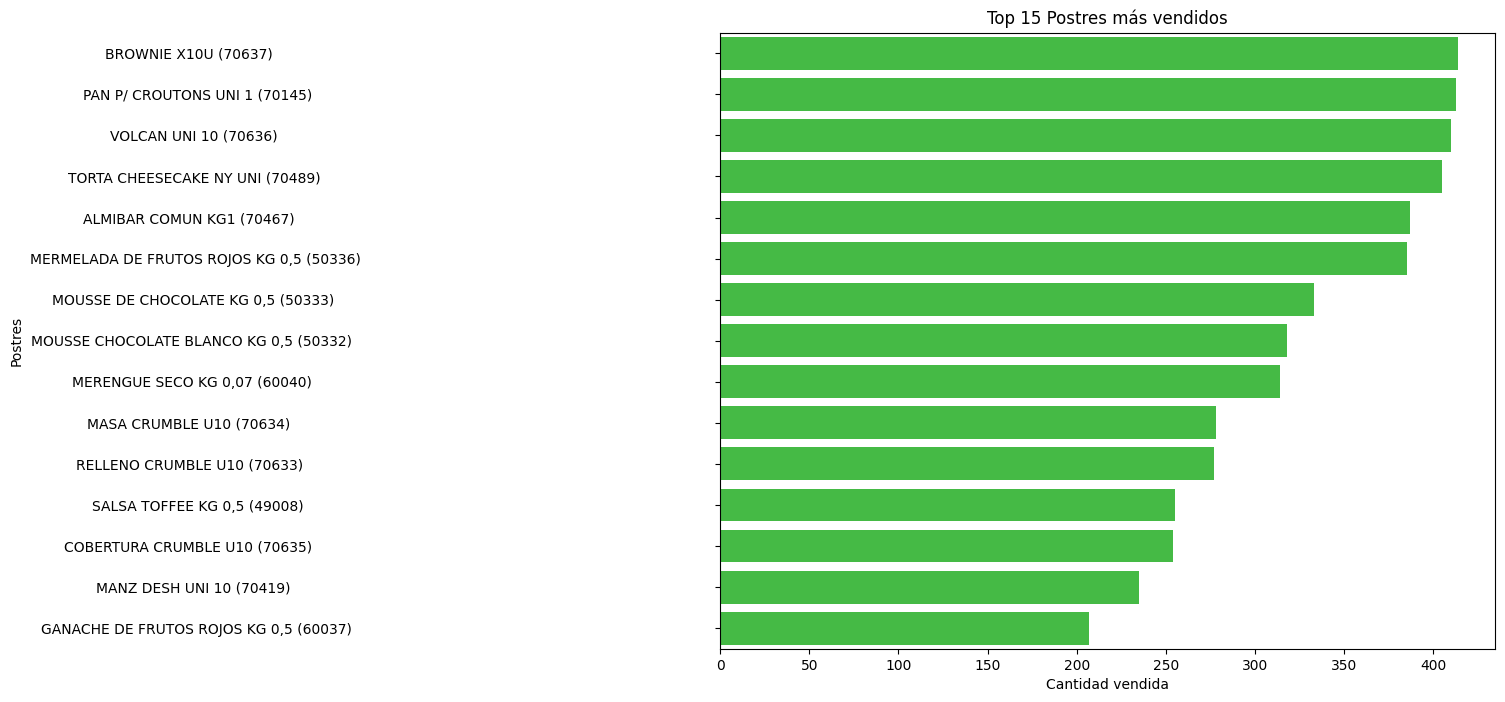

In [ ]:
#Vamos a ver solo los 15 mas vendidos
top_postres = df_postres["NOMBRE.1"].value_counts().head(15).index

#Gráfico
plt.figure(figsize=(10,8))
sns.countplot(y="NOMBRE.1", data=df_postres[df_postres["NOMBRE.1"].isin(top_postres)], order=top_postres, color="#32CD32")
plt.title("Top 15 Postres más vendidos")
plt.xlabel("Cantidad vendida")
plt.ylabel("Postres")
plt.show()

El segundo y el cuarto más vendido son artículos que realiza el sector pastelería, pero uno es utilizado en barra y el otro en plato salado.

Análisis de las ventas por tipo de local

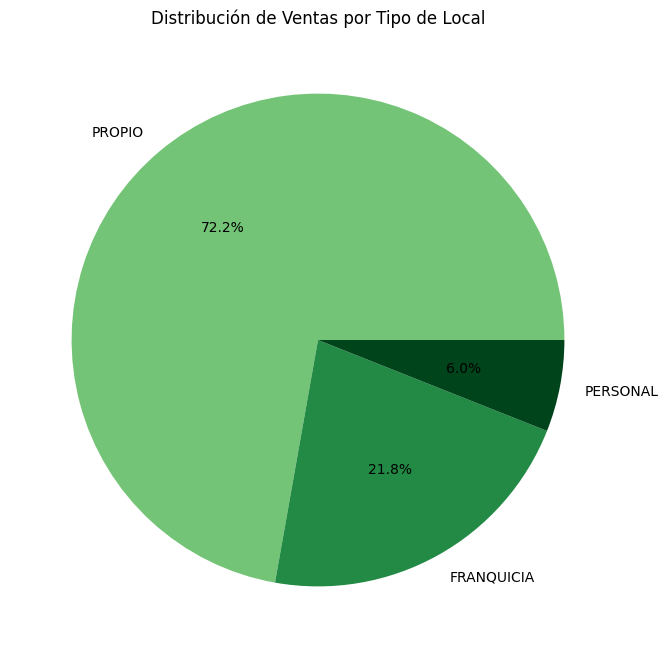

In [ ]:
#Gráfico de torta para ver las ventas dependiendo del tipo de local: Propio, Franquicia o Personal
#Gráfico con matplotlib
#Contamos cuántas ventas hay por tipo de local
conteo_tipo_local = df["TIPO_LOCAL"].value_counts()

#Gráfico de torta (pie chart)
plt.figure(figsize=(8,8))
plt.pie(conteo_tipo_local.values, labels=conteo_tipo_local.index, autopct="%1.1f%%", colors=plt.cm.Greens(np.linspace(0.5, 1, len(conteo_tipo_local))))
plt.title("Distribución de Ventas por Tipo de Local")
plt.show()

Hay más locales propios que franquicias, tiene sentido que la mayor venta sea a los propios.

Analizaremos las ventas de los locales propios por Razón Social

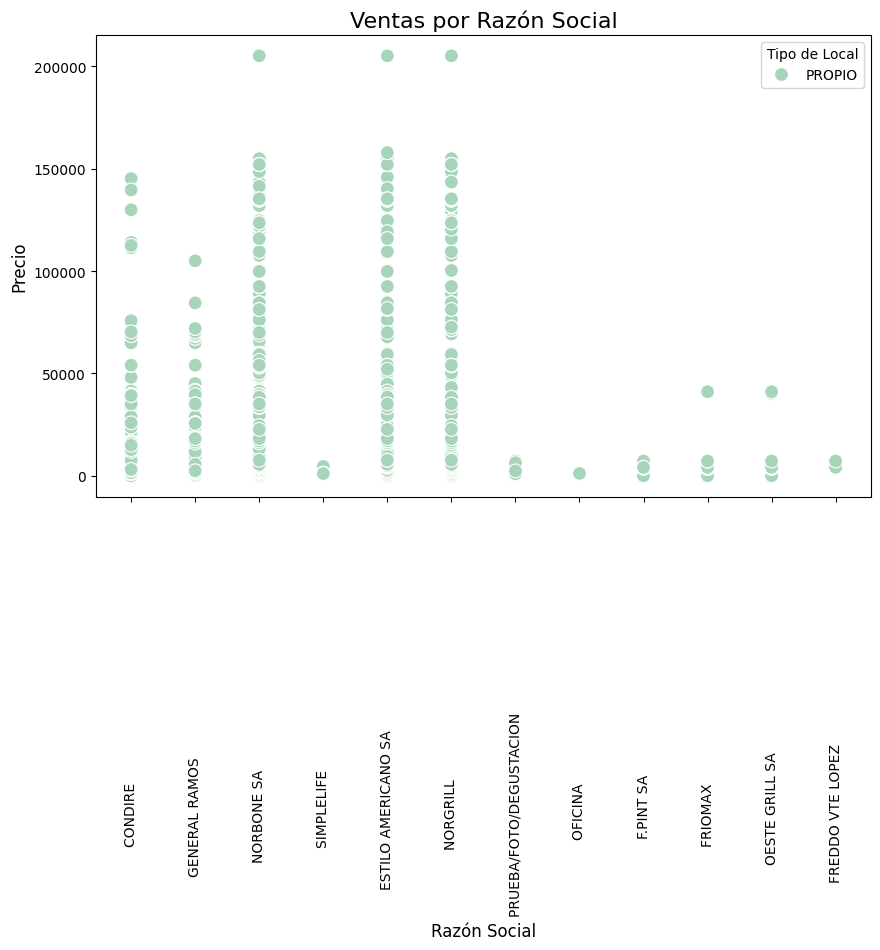

In [ ]:
#Gráfico de dispersión en Seaborn

#Filtramos los datos para que solo queden los locales propios
df_propios_franquicias = df[df["TIPO_LOCAL"] == "PROPIO"]
#df_franquicias = df[df['TIPO_LOCAL'] == 'FRANQUICIA']

#Gráfico
plt.figure(figsize=(10, 6))
#Graficamos los locales propios con un color
sns.scatterplot(data=df_propios, x="RAZON SOCIAL", y="PRECIO", hue="TIPO_LOCAL", style="TIPO_LOCAL", s=100, palette=["#A8D5BA"])
#Graficamos las franquicias con un color diferente
#sns.scatterplot(data=df_franquicias, x='RAZON SOCIAL', y='PRECIO', hue='TIPO_LOCAL', style='TIPO_LOCAL', s=100, palette=['#A9C9FF'])

plt.title("Ventas por Razón Social", fontsize=16)
plt.xlabel("Razón Social", fontsize=12)
plt.ylabel("Precio", fontsize=12)
plt.xticks(rotation=90)
plt.legend(title="Tipo de Local")

plt.show()

Las razones sociales que más compran son las que corresponden a los locales Tucson, Condire junta la venta de 2 locales deli con ubicaciones distintas y General Ramos junta la venta de 3 locales.

Top 20 artículos mas vendidos en locales propios y franquicias

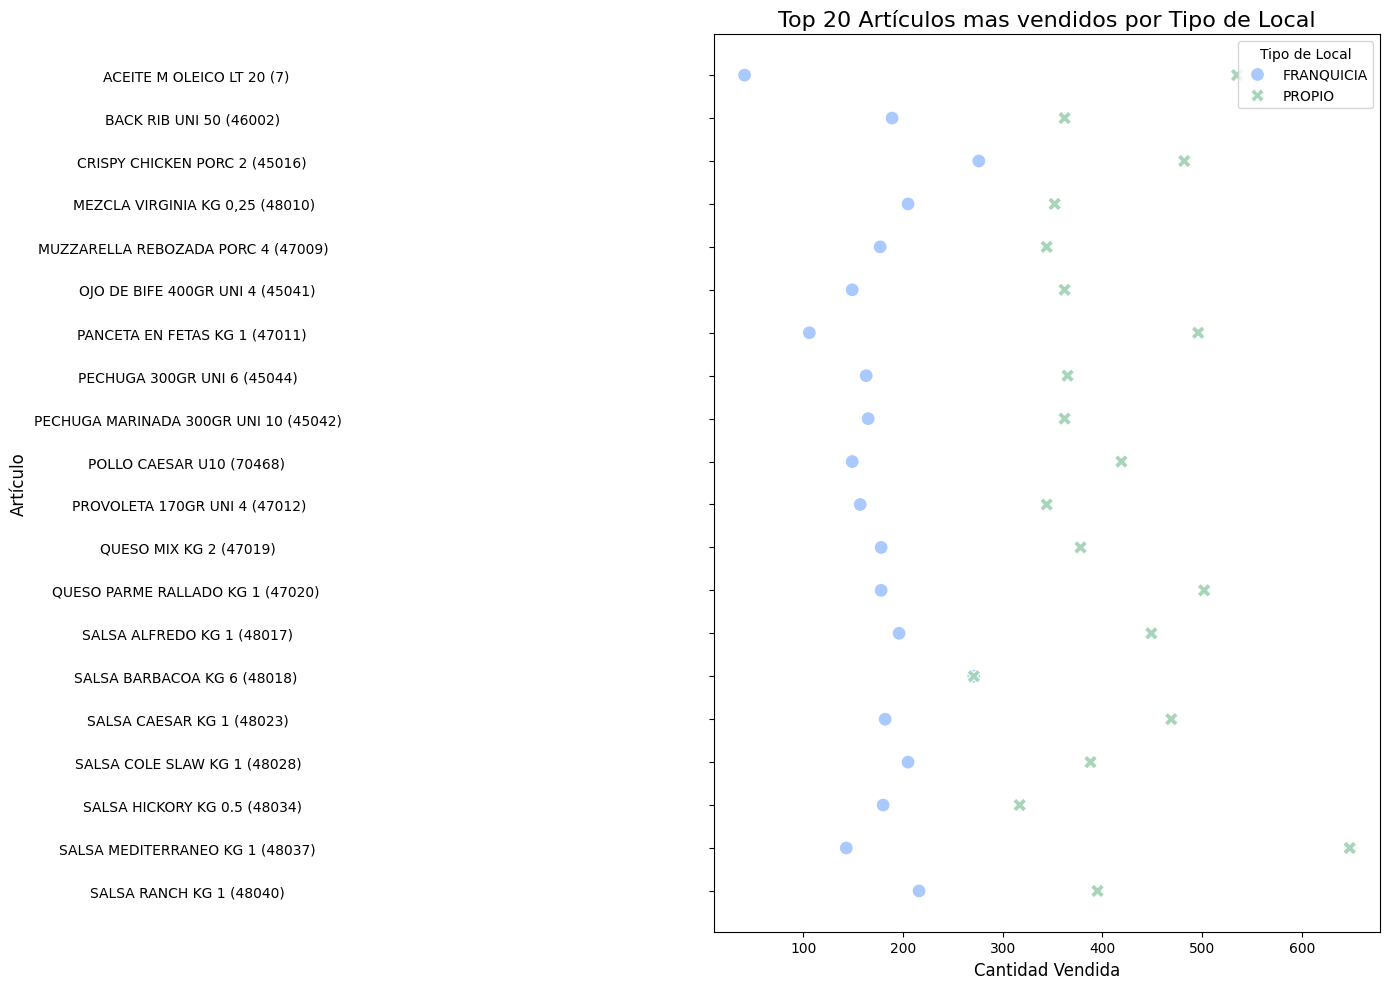

In [ ]:
#Gráfico de dispersión en Seaborn

#Agrupando: cantidad vendida por Artículo y Tipo de Local
ventas_articulos = df[df["TIPO_LOCAL"].isin(["PROPIO", "FRANQUICIA"])].groupby(["NOMBRE.1", "TIPO_LOCAL"]).size().reset_index(name="CANTIDAD")

#sumamos todo por artículo para saber cuáles son los Top 20
top_articulos = ventas_articulos.groupby("NOMBRE.1")["CANTIDAD"].sum().sort_values(ascending=False).head(20).index

#Filtramos para quedarnos solo con esos artículos en el dataset original
ventas_top20 = ventas_articulos[ventas_articulos["NOMBRE.1"].isin(top_articulos)]

#Gráfico
plt.figure(figsize=(14, 10))
sns.scatterplot(data=ventas_top20, x="CANTIDAD", y="NOMBRE.1", hue="TIPO_LOCAL", style="TIPO_LOCAL", palette={"PROPIO": "#A8D5BA", "FRANQUICIA": "#A9C9FF"}, s=100)

plt.title("Top 20 Artículos mas vendidos por Tipo de Local", fontsize=16)
plt.xlabel("Cantidad Vendida", fontsize=12)
plt.ylabel("Artículo", fontsize=12)
plt.legend(title="Tipo de Local")
plt.tight_layout()
plt.show()

Veremos la comparación de las ventas de locales propios y franquicias

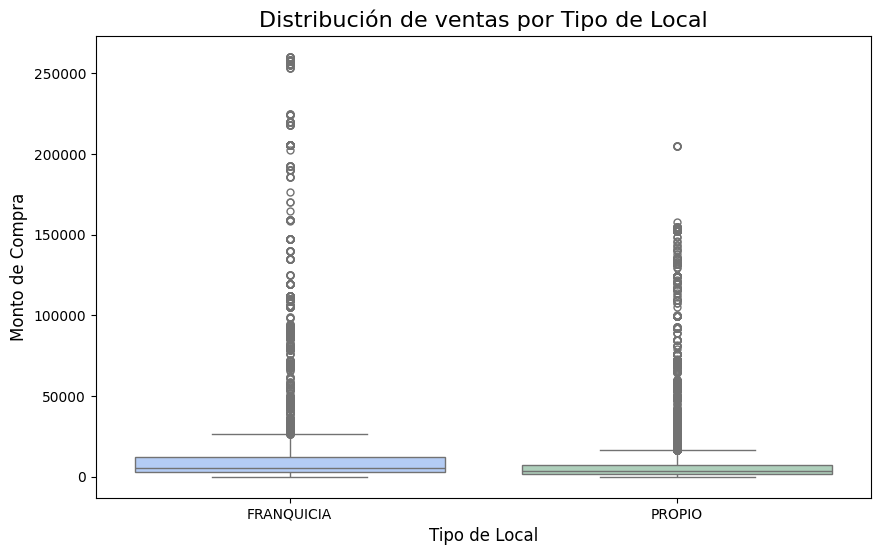

In [ ]:
#BOXPLOT con seaborn
#Filtrar el DataFrame para solo incluir locales propios y franquicias
df_filtrado = df[df["TIPO_LOCAL"].isin(["PROPIO", "FRANQUICIA"])]

#Creamos el gráfico de boxplot
plt.figure(figsize=(10, 6))

#Graficamos los locales propios con verde pastel, franquicias en celeste
sns.boxplot(data=df_filtrado, x="TIPO_LOCAL", y="PRECIO", hue="TIPO_LOCAL", palette={"PROPIO": "#A8D5BA", "FRANQUICIA": "#A9C9FF"}, fliersize=5)
#sns.violinplot(data=df_filtrado, x='TIPO_LOCAL', y='PRECIO', hue='TIPO_LOCAL', palette={'PROPIO': '#A8D5BA', 'FRANQUICIA': '#A9C9FF'}, split=True, inner="quart")

plt.title("Distribución de ventas por Tipo de Local", fontsize=16)
plt.xlabel("Tipo de Local", fontsize=12)
plt.ylabel("Monto de Compra", fontsize=12)
plt.xticks(rotation=0)

plt.show()

Tenemos un artículo que es el que mayor valor tiene que son los back ribs y los Brickell, se venden por cajón de 40/50 unidades, esos son los más alejados.
Para analizar debería de pasar todo a kilos o a misma cantidad de unidades

Análisis de las ventas a lo largo del año

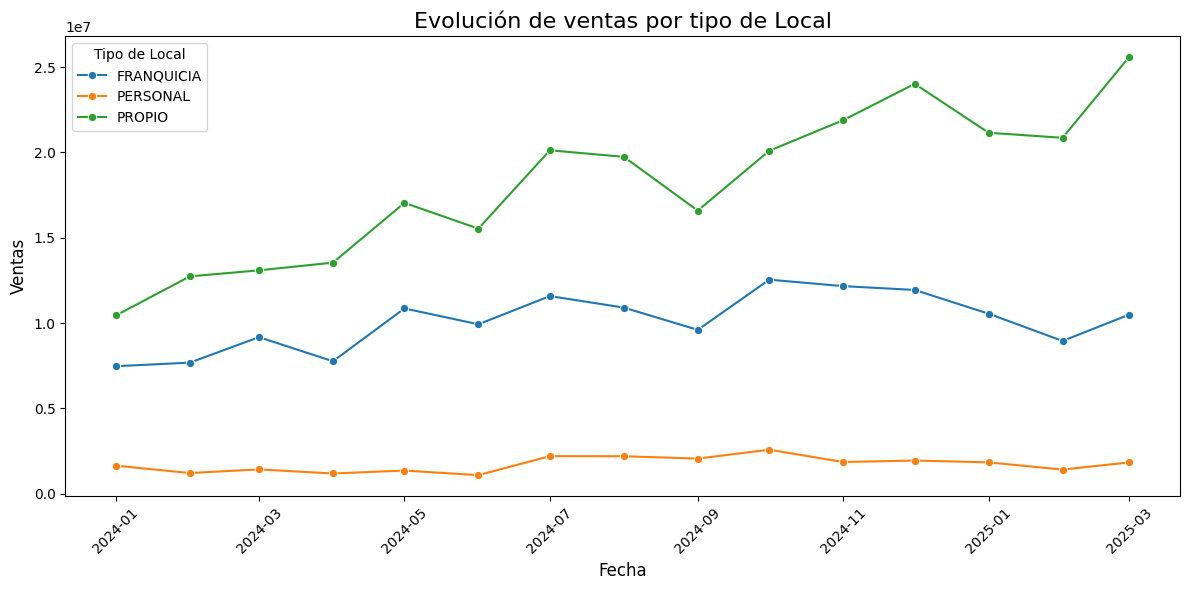

In [ ]:

# Supongamos que tienes un DataFrame 'df' con las columnas 'fecha_venta', 'ventas' y 'tipo_local'
df["FECHA"] = pd.to_datetime(df["FECHA"])

# Crear una columna para el mes/año
df["mes"] = df["FECHA"].dt.to_period("M")

# Agrupar por mes y tipo de local, sumando las ventas
df_agrupado = df.groupby(["mes", "TIPO_LOCAL"])["PRECIO"].sum().reset_index()

# Asegúrate de que mes esté en el formato adecuado para la gráfica
df_agrupado["mes"] = df_agrupado["mes"].dt.to_timestamp()

#CHEQUEO los tipos de las columnas
#print(df_agrupado.dtypes)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_agrupado, x="mes", y="PRECIO", hue="TIPO_LOCAL", marker="o")

plt.title("Evolución de ventas por tipo de Local", fontsize=16)
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Ventas", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Tipo de Local")
plt.tight_layout()

plt.show()

En la mayoría de los meses en que baja la venta a las franquicias tambien baja la venta a los locales propios salvo en el mes de diciembre que se observa que la venta a los propios es mayor pero no a las franquicias, lo cual es raro ya que es el mayo mes de venta.